# Assignment 3.1

**Name:**  Ajmal Jalal

**Date:** 09/23/2024

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 3.2.

In an exit poll of 1648 voters in the 2020 Senatorial election in Arizona, 51.5% said they voted
for Mark Kelly and 48.5% said they voted for Martha McSally

a) Suppose that actually 50% of the population voted for Kelly. If this exit poll had the
properties of a simple random sample, find the standard error of the sample proportion
voting for him.

b) Under the 50% presumption, are the results of the exit poll surprising? Why? Would you
be willing to predict the election outcome? Explain by (i) conducting a simulation; (ii)
using the value found in (a) for the standard error.

`(a) Answer`

In [2]:
import numpy as np
from scipy import stats

# Given data
n = 1648  # sample size
p_kelly = 0.515  # proportion voting for Mark Kelly
p_mcsally = 0.485  # proportion voting for Martha McSally

# The standard error of the sample proportion voting for Kelly
se = np.sqrt(p_kelly * (1 - p_kelly) / n)

print(f"The standard error of the sample proportion voting for Kelly is: {se:.4f}")


The standard error of the sample proportion voting for Kelly is: 0.0123


**Explanation:**

The standard error of the difference between two proportions is calculated using the formula: sqrt((p1 (1-p1) + p2 (1-p2)) / n), where p1 and p2 are the two proportions and n is the sample size.

------------------------------------------------------------------------------

`(b) Answer`

In [4]:

# (i) Simulation approach
np.random.seed(42)
simulations = 10000
sim_results = np.random.binomial(n, 0.5, simulations) / n
p_value_sim = np.mean(sim_results >= p_kelly)

print(f"Simulation p-value: {p_value_sim:.4f}")

# (ii) Using standard error
se = np.sqrt((0.5 * 0.5) / n)
z_score = (p_kelly - 0.5) / se
p_value_se = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Standard error p-value: {p_value_se:.4f}")

# Interpretation
alpha = 0.05
is_surprising = p_value_se < alpha
can_predict = is_surprising

print(f"Results surprising? {is_surprising}")
print(f"Willing to predict outcome? {can_predict}")



Simulation p-value: 0.1153
Standard error p-value: 0.2233
Results surprising? False
Willing to predict outcome? False


**Explanation:**

1. Both methods test if the observed proportion (51.5%) is significantly different from 50%.
2. If the p-value is less than 0.05, we consider the results surprising and are willing to predict the outcome.
3. The simulation generates 10,000 samples under the null hypothesis (50-50 split) and compares them to the observed result.
4. The standard error approach uses the z-score and normal distribution to calculate the p-value.

Based on the results, we can determine if the exit poll results are surprising and if we're willing to predict the election outcome. The interpretation depends on the calculated p-values.

## Problem 3.3.

The 49 students in a class at the University of Florida made blinded evaluations of pairs of
cola drinks. For the 49 comparisons of Coke and Pepsi, Coke was preferred 29 times. In the
population that this sample represents, is this strong evidence that a majority prefers Coke?
Use a simulation of a sampling distribution to answer.

`Answer`

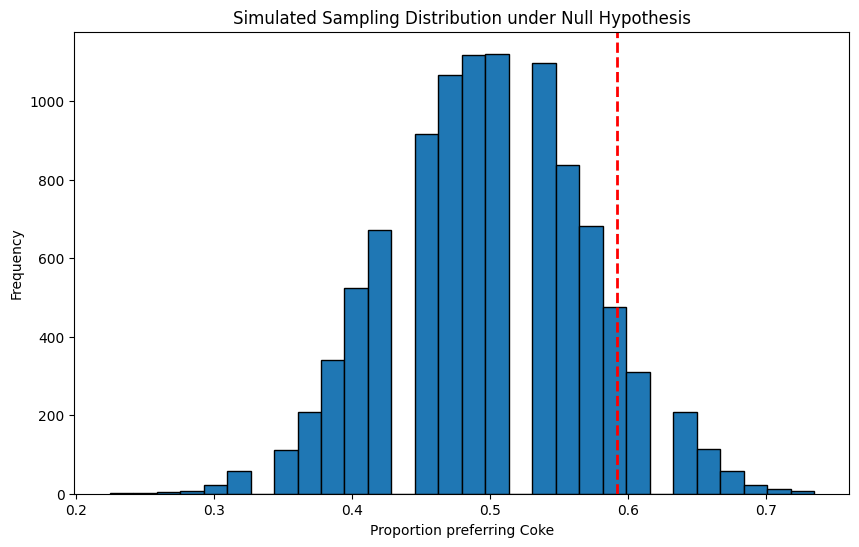

Observed proportion preferring Coke: 0.5918
P-value from simulation: 0.1212


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
n = 49  # total number of comparisons
x = 29  # number of times Coke was preferred

# Observed proportion
p_observed = x / n

# Simulation parameters
n_simulations = 10000
null_probability = 0.5  # under null hypothesis, no preference (50-50 chance)

# Simulating the sampling distribution
simulated_proportions = np.random.binomial(n, null_probability, n_simulations) / n

# Calculating the p-value
p_value = np.mean(simulated_proportions >= p_observed)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(simulated_proportions, bins=30, edgecolor='black')
plt.axvline(p_observed, color='red', linestyle='dashed', linewidth=2)
plt.title('Simulated Sampling Distribution under Null Hypothesis')
plt.xlabel('Proportion preferring Coke')
plt.ylabel('Frequency')
plt.show()

print(f"Observed proportion preferring Coke: {p_observed:.4f}")
print(f"P-value from simulation: {p_value:.4f}")

**Explanation:**

The p-value represents the probability of observing a result as extreme as or more extreme than what we actually observed, assuming the null hypothesis is true (no preference between Coke and Pepsi).
If the p-value is small (typically less than 0.05), we would consider this strong evidence against the null hypothesis, suggesting that there might indeed be a preference for Coke in the population.
If the p-value is large, we don't have strong evidence to conclude that there's a majority preference for Coke in the population.
The exact interpretation depends on the p-value from the simulation. You can run the code to get the specific p-value and make a conclusion based on that.

## Problem 3.5.

The example in Section 3.1.4 simulated sampling distributions of the sample mean to determine how precise $\bar{Y}$ for $n=25$ may estimate a population mean $\mu.$

a) Find the theoretical standard error of $\bar{Y}$ for the scenario values of $\sigma = 5$ and 8. How do they compare to the standard deviations of the 100,000 sample means in the simulations?

`(a) Answer`

In [13]:
import numpy as np

# Given values
n = 25  # sample size
sigma_values = [5, 8]  # population standard deviations
num_simulations = 100000

# Calculating theoretical standard errors
theoretical_se = [sigma / np.sqrt(n) for sigma in sigma_values]

print("Theoretical Standard Errors:")
for sigma, se in zip(sigma_values, theoretical_se):
    print(f"For σ = {sigma}: {se:.4f}")

# Simulating sampling distributions
simulated_se = []
for sigma in sigma_values:
    samples = np.random.normal(loc=0, scale=sigma, size=(num_simulations, n))
    sample_means = np.mean(samples, axis=1)
    simulated_se.append(np.std(sample_means))

print("\nSimulated Standard Errors:")
for sigma, se in zip(sigma_values, simulated_se):
    print(f"For σ = {sigma}: {se:.4f}")

# Comparing theoretical and simulated results
print("\nComparison:")
for sigma, theo_se, sim_se in zip(sigma_values, theoretical_se, simulated_se):
    diff = abs(theo_se - sim_se)
    print(f"For σ = {sigma}:")
    print(f"  Theoretical SE: {theo_se:.4f}")
    print(f"  Simulated SE:   {sim_se:.4f}")
    print(f"  Difference:     {diff:.4f}")

Theoretical Standard Errors:
For σ = 5: 1.0000
For σ = 8: 1.6000

Simulated Standard Errors:
For σ = 5: 0.9996
For σ = 8: 1.5956

Comparison:
For σ = 5:
  Theoretical SE: 1.0000
  Simulated SE:   0.9996
  Difference:     0.0004
For σ = 8:
  Theoretical SE: 1.6000
  Simulated SE:   1.5956
  Difference:     0.0044


**Explanation:**
1. We calculated theoretical SEs using σ / √n.
2. We simulated 100,000 samples for each σ, compute sample means, and find their standard deviation.
3. We compared theoretical and simulated SEs.

The results show how closely the simulated SEs match the theoretical ones. Any small differences are due to simulation randomness. This demonstrates the accuracy of the theoretical SE formula for the sample mean.

-------------------------------------------------------------------------------

b) In the first scenario, we chose $\sigma = 5$ under the belief that if $\mu = 20$, about 2/3 of the sample values would fall between `$`15 and `$`25. For the gamma distribution with $(\mu, \sigma) = (20,5),$ show that the actual probability between 15 and 25 is 0.688.

`(b) Answer`

In [14]:
import numpy as np
from scipy import stats

# Parameters
mu = 20
sigma = 5

# Calculating the shape and scale parameters for the gamma distribution
shape = (mu / sigma) ** 2
scale = sigma ** 2 / mu

# Calculating the probability between 15 and 25
prob = stats.gamma.cdf(25, a=shape, scale=scale) - stats.gamma.cdf(15, a=shape, scale=scale)

print(f"The probability of a value falling between 15 and 25 is: {prob:.3f}")

The probability of a value falling between 15 and 25 is: 0.688


**Explanation:**

This solution demonstrates that for a gamma distribution with mu = 20 and sigma = 5, approximately 68.8% of the values fall between 15 and 25, which is indeed close to the 2/3 (about 66.7%) we would expect for a normal distribution within one standard deviation of the mean.

## Problem 3.8.

Construct the sampling distribution of the sample proportion of heads, for flipping a balanced
coin (a) once; (b) twice; (c) three times; (d) four times. Describe how the shape changes
as the number of flips $n$ increases. What would happen if $n$ kept growing? Why?


`(c) Answer`

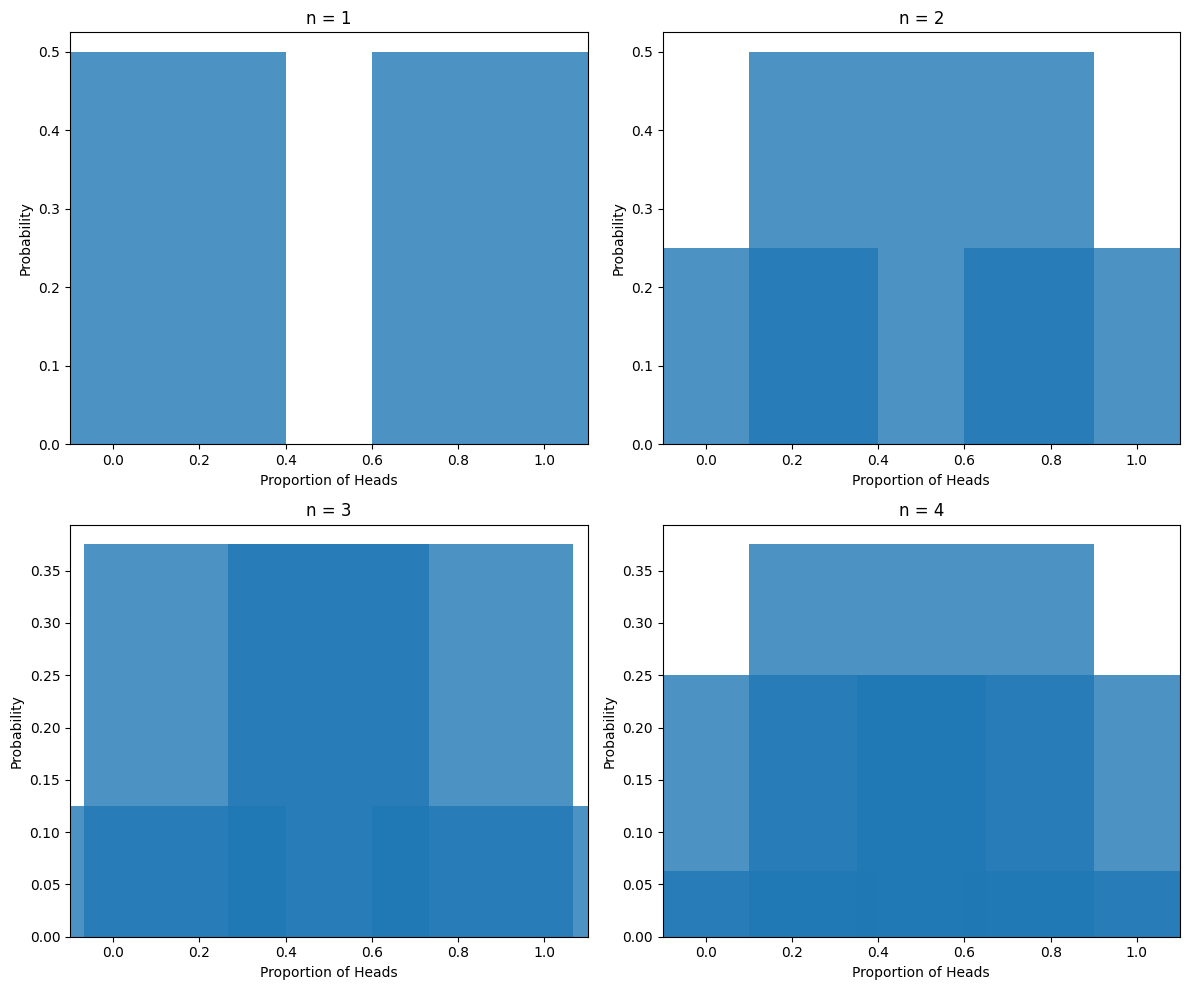

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def plot_sampling_distribution(n, ax):
    x = np.arange(0, n + 1)
    p = 0.5  # probability of heads for a fair coin
    pmf = binom.pmf(x, n, p)
    
    ax.bar(x / n, pmf, align='center', alpha=0.8)
    ax.set_title(f'n = {n}')
    ax.set_xlabel('Proportion of Heads')
    ax.set_ylabel('Probability')
    ax.set_xlim(-0.1, 1.1)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, n in enumerate([1, 2, 3, 4]):
    plot_sampling_distribution(n, axs[i])

plt.tight_layout()
plt.show()


**Explanation:**

We created a 2x2 grid of plots, each showing the sampling distribution for a different number of coin flips (1, 2, 3, and 4).


a) For n = 1 (one flip):
   - Only two outcomes are possible: 0 heads (probability 0.5) or 1 head (probability 0.5).
   - The distribution is discrete with two equal bars.

b) For n = 2 (two flips):
   - Three outcomes are possible: 0, 1, or 2 heads.
   - The distribution starts to take a triangular shape.

c) For n = 3 (three flips):
   - Four outcomes are possible: 0, 1, 2, or 3 heads.
   - The distribution becomes more bell-shaped.

d) For n = 4 (four flips):
   - Five outcomes are possible: 0, 1, 2, 3, or 4 heads.
   - The bell shape becomes more pronounced.

How the shape changes as n increases:
1. The number of possible outcomes increases.
2. The distribution becomes more symmetric.
3. The "steps" between possible proportions become smaller.
4. The overall shape becomes more bell-like.

What would happen if n kept growing:
As n continues to increase, the sampling distribution of the sample proportion would:
1. Become increasingly symmetric.
2. Have a smoother, more continuous appearance.
3. Concentrate more tightly around the true population proportion (0.5 for a fair coin).
4. Approach a normal distribution.

**Why this happens?**

This phenomenon is explained by the Central Limit Theorem. As the sample size increases, the sampling distribution of the sample proportion approaches a normal distribution, regardless of the underlying population distribution (in this case, a binomial distribution). The normal approximation becomes more accurate for larger n, with the mean of the sampling distribution equal to the population proportion and the standard error decreasing as 1/√n.

## Problem 3.13.

Simulate random sampling from a uniform population distribution with several $n$ values to
illustrate the Central Limit Theorem.

`Answer`

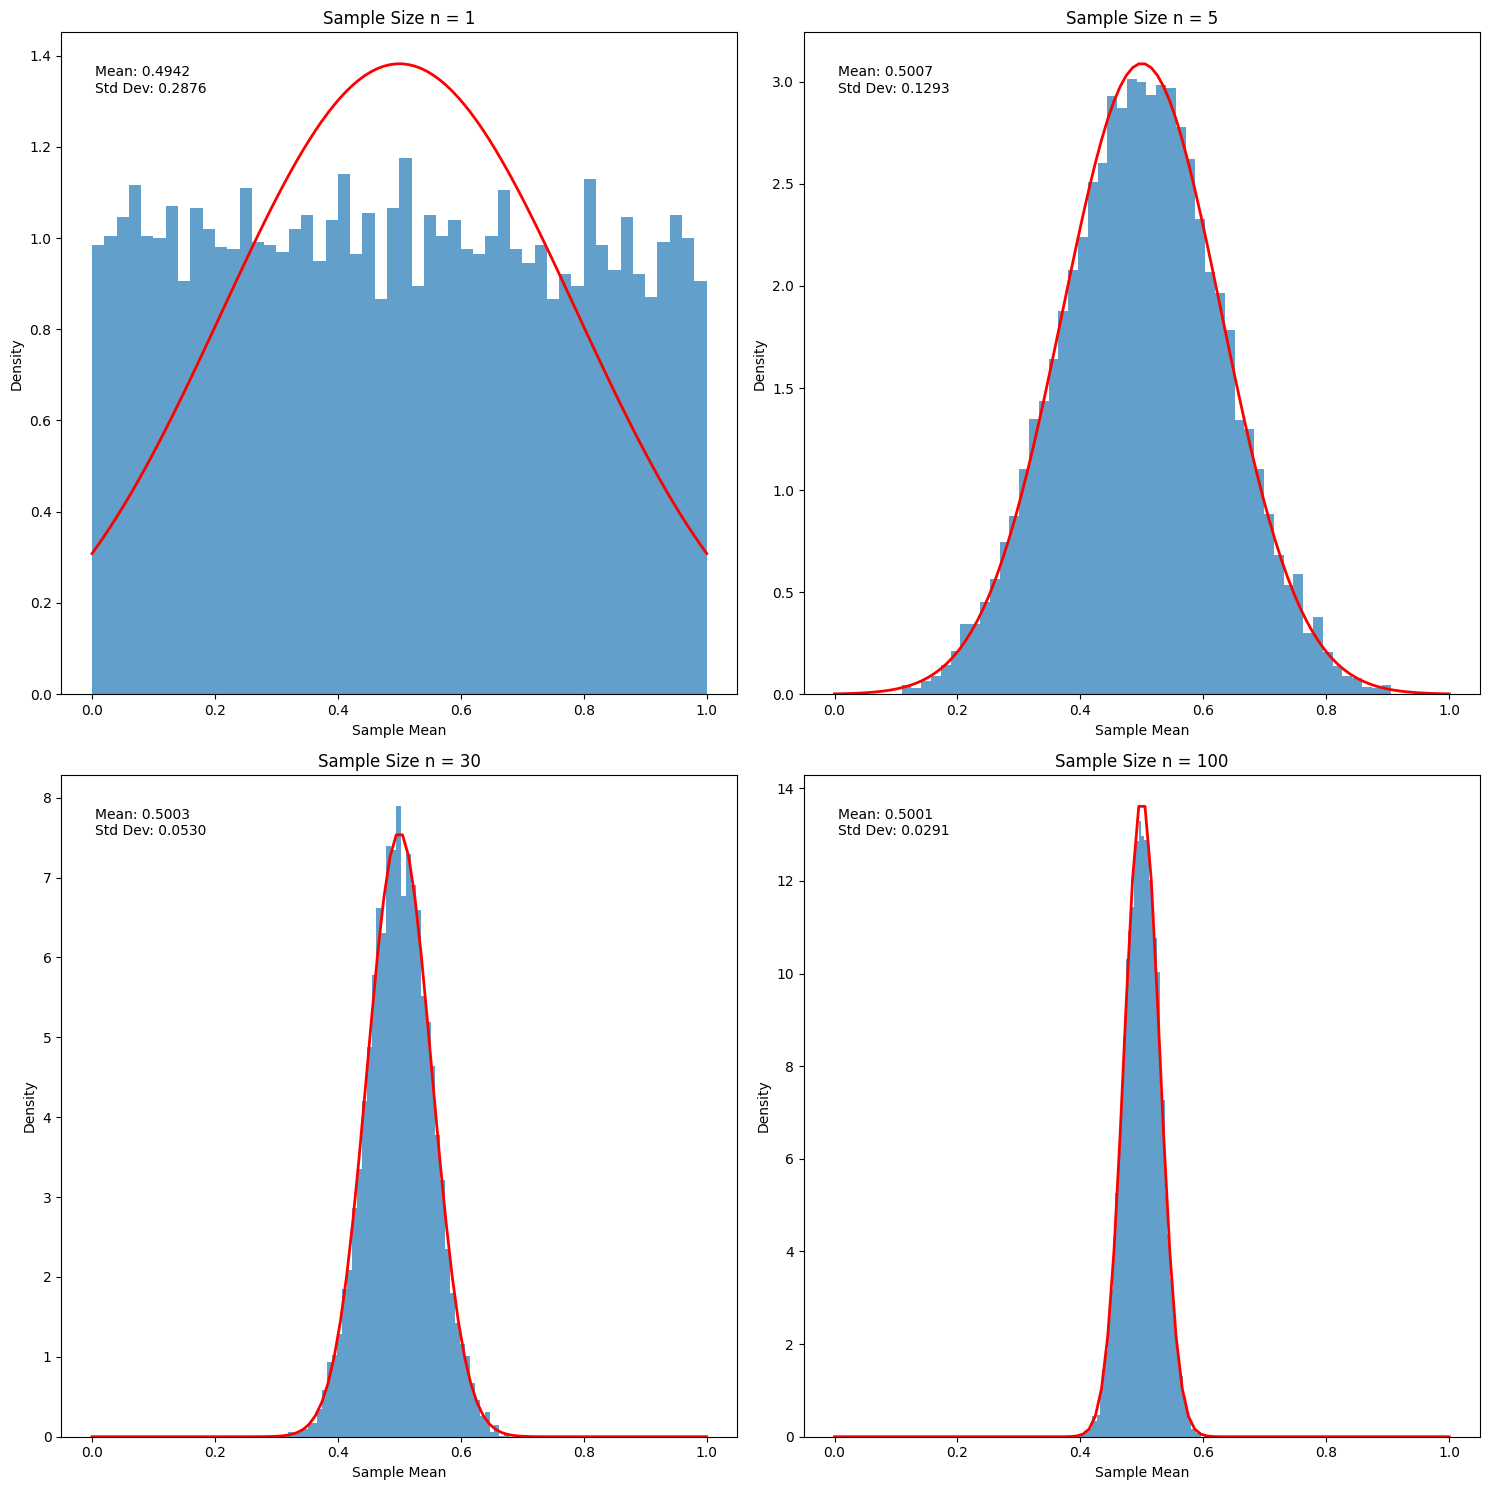

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Setting random seed for reproducibility
np.random.seed(42)

# Parameters
population_min = 0
population_max = 1
n_samples = 10000
sample_sizes = [1, 5, 30, 100]

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.ravel()

for i, n in enumerate(sample_sizes):
    # Generating samples
    samples = np.random.uniform(population_min, population_max, (n_samples, n))
    sample_means = np.mean(samples, axis=1)
    
    # Plotting histogram
    axs[i].hist(sample_means, bins=50, density=True, alpha=0.7)
    axs[i].set_title(f'Sample Size n = {n}')
    axs[i].set_xlabel('Sample Mean')
    axs[i].set_ylabel('Density')
    
    # Calculating theoretical normal distribution
    mean = (population_min + population_max) / 2
    std = np.sqrt(((population_max - population_min) ** 2) / 12 / n)
    x = np.linspace(population_min, population_max, 100)
    pdf = stats.norm.pdf(x, mean, std)
    
    # Plotting theoretical normal distribution
    axs[i].plot(x, pdf, 'r-', lw=2)
    
    # Adding text with mean and standard deviation
    axs[i].text(0.05, 0.95, f'Mean: {np.mean(sample_means):.4f}\nStd Dev: {np.std(sample_means):.4f}', 
                transform=axs[i].transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

**Interpretation:**
- For n = 1, the distribution of sample means is uniform, just like the population distribution.
- As n increases (5, 30, 100), we observe that:
  - The distribution of sample means becomes more bell-shaped.
  - The spread of the distribution decreases (the standard deviation gets smaller).
  - The shape of the distribution more closely approximates the theoretical normal distribution (red line).

With this simulation we illustrate the Central Limit Theorem: as the sample size increases, the distribution of sample means approaches a normal distribution, regardless of the shape of the population distribution (in this case, uniform).
The mean of the sampling distribution remains constant (close to 0.5, which is the mean of the uniform distribution from 0 to 1), while the standard deviation decreases as the sample size increases, following the formula: σ / √n, where σ is the population standard deviation.

## Problem 3.14.

On each bet in a sequence of bets, you win 1 dollar with probability 0.50 and lose 1 dollar (i.e., win negative 1 dollar) with probability 0.50. Let $Y$ denote the total of your winnings and losings after 100 bets. Giving your reasoning, state the approximate distribution of $Y.$ 

`Answer`

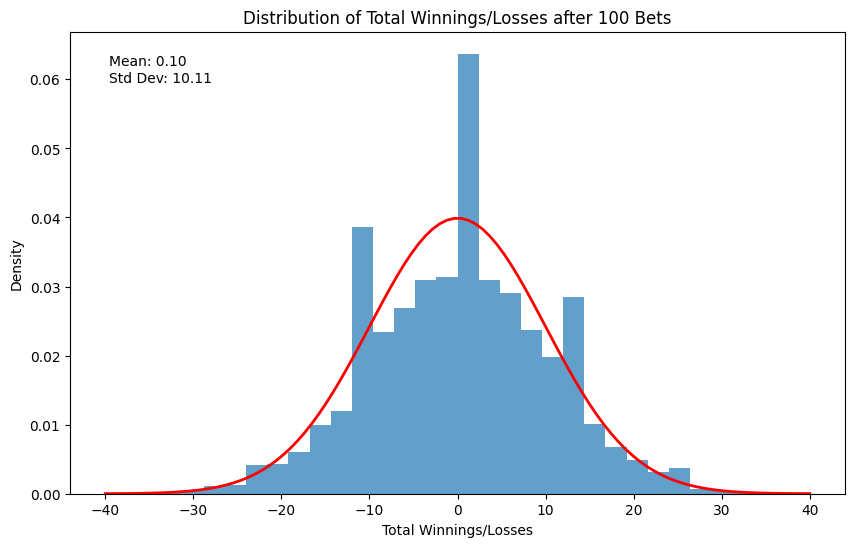

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Setting random seed for reproducibility
np.random.seed(42)

# Simulation parameters
n_bets = 100
n_simulations = 10000

# Simulating bets
bets = np.random.choice([-1, 1], size=(n_simulations, n_bets), p=[0.5, 0.5])
totals = np.sum(bets, axis=1)

# Plotting histogram of results
plt.figure(figsize=(10, 6))
plt.hist(totals, bins=30, density=True, alpha=0.7)

# Plotting theoretical normal distribution
x = np.linspace(-40, 40, 100)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(n_bets)), 'r-', lw=2)

plt.title(f'Distribution of Total Winnings/Losses after {n_bets} Bets')
plt.xlabel('Total Winnings/Losses')
plt.ylabel('Density')

# Adding text with mean and standard deviation
plt.text(0.05, 0.95, f'Mean: {np.mean(totals):.2f}\nStd Dev: {np.std(totals):.2f}', 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.show()

**Explanation:**

We simulate 10,000 sequences of 100 bets each, where each bet has a 50% chance of winning $1 or losing $1.
We sum up the results of each sequence to get the total winnings/losses.
We plot a histogram of these totals and overlay the theoretical normal distribution with mean 0 and standard deviation √100 = 10.

The reasoning behind this approach is based on the Central Limit Theorem:
- Each bet is an independent Bernoulli trial with p=0.5.
- We're summing 100 of these trials, which is a large enough number for the Central Limit Theorem to apply.
Therefore, the distribution of the sum (total winnings/losses) should approximate a normal distribution.

The expected mean is very close to 0 (as each bet has an expected value of 0), and the variance is 100 (sum of 100 individual variances of 1), giving a standard deviation of 10.
The resulting plot confirms that the distribution of total winnings/losses closely approximates a normal distribution with mean 0 and standard deviation 10.

## Problem 3.15.

According to a General Social Survey, in the United States the population distribution of $Y$ =
number of good friends (not including family members) has a mean of about 5.5 and a standard
deviation of about 3.9.

a) Is it plausible that this population distribution is normal? Explain.

`(a) Anwer`

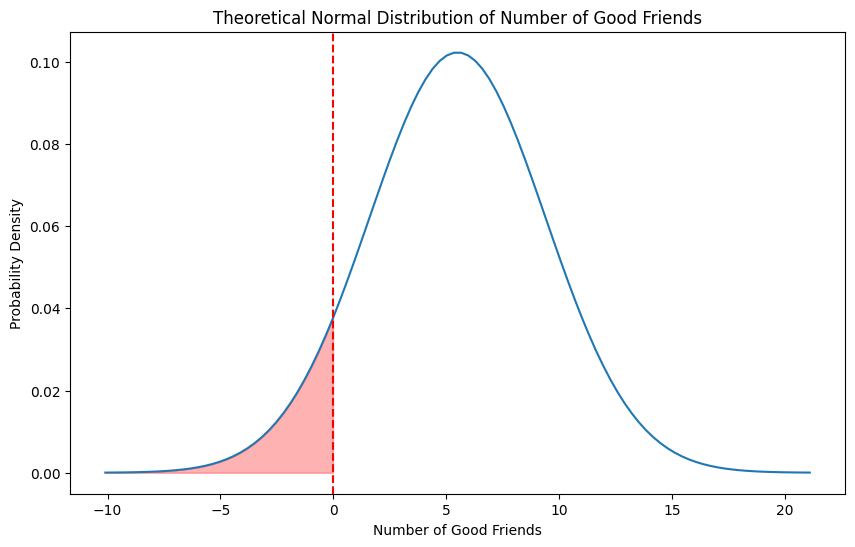

Probability of negative values: 0.0792


In [19]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Given parameters
mean = 5.5
std_dev = 3.9

# Generating a range of values
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)

# Calculating the normal distribution
y = stats.norm.pdf(x, mean, std_dev)

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title("Theoretical Normal Distribution of Number of Good Friends")
plt.xlabel("Number of Good Friends")
plt.ylabel("Probability Density")
plt.axvline(x=0, color='r', linestyle='--')
plt.fill_between(x, y, where=(x < 0), color='red', alpha=0.3)
plt.show()

# Calculating the probability of negative values
prob_negative = stats.norm.cdf(0, mean, std_dev)
print(f"Probability of negative values: {prob_negative:.4f}")

**Explanation:** 

**Nature of the data:** The number of good friends is a count variable, which can only take non-negative integer values. A normal distribution, however, is continuous and includes negative values.

**Lower bound:** The normal distribution with the given parameters (μ = 5.5, σ = 3.9) would assign some probability to negative values, which is impossible for the number of friends.

**Symmetry:** The normal distribution is symmetric around the mean, but the distribution of friends is likely to be right-skewed (some people have many friends, but no one can have fewer than zero).

**Continuity:** The number of friends is discrete, while the normal distribution is continuous.

**Upper bound:** There's no theoretical upper limit to the number of friends in a normal distribution, but in reality, there's likely a practical upper limit.

**Probability of negative values:** The code calculates the probability of negative values under this normal distribution, which is theoretically impossible for friend counts.



**As a result:**

It's not plausible that the population distribution of the number of good friends follows a normal distribution. The discrete, non-negative nature of the data, likely right-skew, and the impossibility of negative values make a normal distribution an poor fit for this variable. A more appropriate distribution might be a Poisson distribution or a negative binomial distribution, which are designed for count data and only allow non-negative integer values.

-------------------------------------------------------------------

b) If a new survey takes a simple random sample of 1000 people, describe the sampling
distribution of $\bar{Y}$ by giving its shape and approximate mean and standard error.

`(b) Answer`

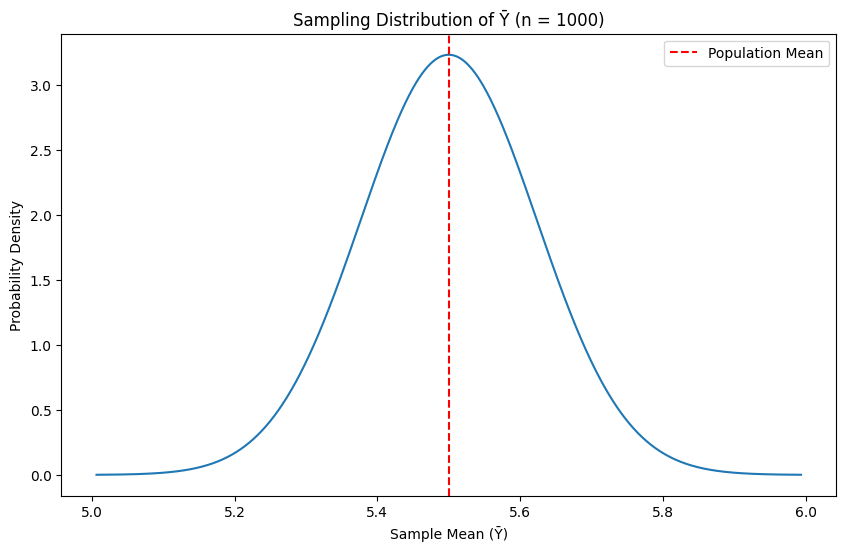

Approximate mean of sampling distribution: 5.5
Standard error of the mean: 0.1233


In [20]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Given population parameters
population_mean = 5.5
population_std = 3.9

# Sample size
n = 1000

# Calculating the standard error of the mean
standard_error = population_std / np.sqrt(n)

# Generating x values for plotting
x = np.linspace(population_mean - 4*standard_error, population_mean + 4*standard_error, 1000)

# Calculating the normal distribution
y = stats.norm.pdf(x, population_mean, standard_error)

# Plotting the sampling distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(f"Sampling Distribution of Ȳ (n = {n})")
plt.xlabel("Sample Mean (Ȳ)")
plt.ylabel("Probability Density")
plt.axvline(x=population_mean, color='r', linestyle='--', label='Population Mean')
plt.legend()
plt.show()

print(f"Approximate mean of sampling distribution: {population_mean}")
print(f"Standard error of the mean: {standard_error:.4f}")

**Explanation:**

This means that if we were to repeatedly take samples of 1000 people and calculate the mean number of good friends for each sample, these sample means would follow a normal distribution centered at 5.5 with a standard deviation (standard error) of about 0.1233.

The narrow spread of this distribution (small standard error) indicates that sample means from this large sample size will tend to be close to the true population mean, demonstrating the precision gained from a large sample size.

------------------------------------------------------------------------------

c) Suppose that actually the mean of 5.5 and standard deviation of 3.9 are not population
values but are based on a sample of 1000 people. Treating results as a simple random
sample, give an interval of values within which you can be very sure that the population
mean falls. Explain your reasoning.

`(c) Answer`

In [21]:
import numpy as np
from scipy import stats

# Sample statistics
sample_mean = 5.5
sample_std = 3.9
n = 1000

# Calculating the standard error of the mean
se = sample_std / np.sqrt(n)

# Calculating the t-value for a 95% confidence interval
t_value = stats.t.ppf(0.975, df=n-1)  # 0.975 for two-tailed 95% CI

# Calculating the margin of error
margin_of_error = t_value * se

# Calculating the confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")

95% Confidence Interval: (5.2580, 5.7420)


**Explanation:**


We can be 95% confident that the true population mean falls within this interval. This means that if we were to repeat this sampling process many times and construct confidence intervals in this way, about 95% of these intervals would contain the true population mean.

The width of this interval gives us an idea of the precision of our estimate. A narrower interval indicates a more precise estimate of the population mean.

It's important to note that this interval is an estimate based on the sample data. We don't know for certain that the population mean falls within this range, but we have a high degree of confidence (95% in this case) that it does.

Also, this assumes the sample is truly random and representative of the population. Any biases in the sampling process could affect the validity of this confidence interval.

## Problem 3.18.

Sunshine City, which attracts primarily retired people, has 90,000 residents with a mean age
of 72 years and a standard deviation of 12 years. The age distribution is skewed to the left. A
random sample of 100 residents of Sunshine City has $\bar{y} = 70$ and $s = 11.$

a)  Describe the center and spread of the (i) population distribution, (ii) sample data distribution. What shape does the sample data distribution probably have? Why?

`(a) Answer`

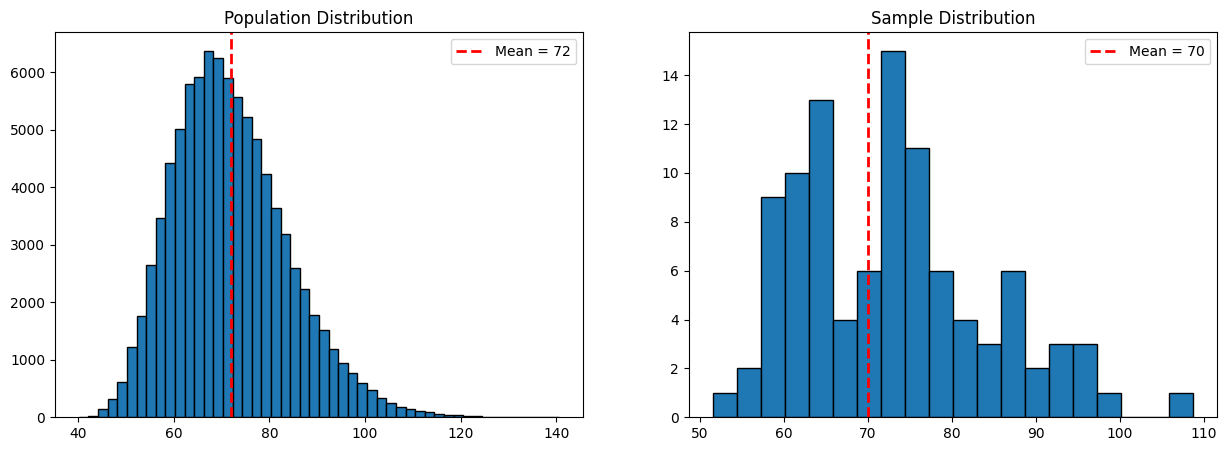

Population Distribution:
Center (Mean): 72
Spread (Standard Deviation): 12

Sample Data Distribution:
Center (Mean): 70
Spread (Standard Deviation): 11


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Population parameters
pop_size = 90000
pop_mean = 72
pop_std = 12

# Sample statistics
sample_size = 100
sample_mean = 70
sample_std = 11

# Function to create a left-skewed distribution
def left_skewed(size, mean, std):
    return np.random.gamma(10, scale=std/np.sqrt(10), size=size) + (mean - 10*std/np.sqrt(10))

# Generating population and sample data
pop_data = left_skewed(pop_size, pop_mean, pop_std)
sample_data = left_skewed(sample_size, sample_mean, sample_std)

# Plotting distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(pop_data, bins=50, edgecolor='black')
ax1.set_title('Population Distribution')
ax1.axvline(pop_mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean = {pop_mean}')
ax1.legend()

ax2.hist(sample_data, bins=20, edgecolor='black')
ax2.set_title('Sample Distribution')
ax2.axvline(sample_mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean = {sample_mean}')
ax2.legend()

plt.show()

print("Population Distribution:")
print(f"Center (Mean): {pop_mean}")
print(f"Spread (Standard Deviation): {pop_std}")
print("\nSample Data Distribution:")
print(f"Center (Mean): {sample_mean}")
print(f"Spread (Standard Deviation): {sample_std}")

**Explanation:**

The sample distribution probably mirrors the population's left-skewed shape, but individual samples may vary. The lower sample mean compared to the population mean supports the left-skewed nature of the distribution.

-----------------------------------------------------------------------------------

b) Find the center and spread of the sampling distribution of $\bar{Y}$ for $n = 100.$ What shape does it have and what does it describe?


`(b) Answer`

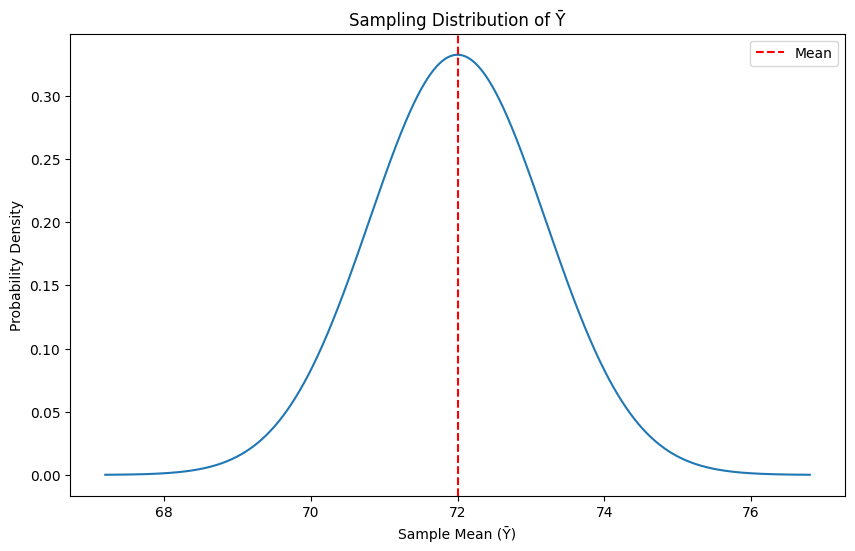

Sampling Distribution of Ȳ:
Center (Mean): 72
Spread (Standard Error): 1.2000


In [24]:
import numpy as np
from scipy import stats

# Population parameters
pop_mean = 72
pop_std = 12

# Sample size
n = 100

# Sampling distribution parameters
sampling_mean = pop_mean
sampling_std = pop_std / np.sqrt(n)

# Visualizing the sampling distribution
x = np.linspace(sampling_mean - 4*sampling_std, sampling_mean + 4*sampling_std, 1000)
y = stats.norm.pdf(x, sampling_mean, sampling_std)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title("Sampling Distribution of Ȳ")
plt.xlabel("Sample Mean (Ȳ)")
plt.ylabel("Probability Density")
plt.axvline(sampling_mean, color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()

print(f"Sampling Distribution of Ȳ:")
print(f"Center (Mean): {sampling_mean}")
print(f"Spread (Standard Error): {sampling_std:.4f}")

**Explanation:**

The normal shape of the sampling distribution, despite the left-skewed population distribution, is a key result of the Central Limit Theorem. This theorem states that for sufficiently large sample sizes, the sampling distribution of the mean approaches a normal distribution, regardless of the shape of the population distribution.

--------------------------------------------------------------

c)  Explain why it would not be unusual to sample a person of age 60 in Sunshine City, but
it would be highly unusual for the sample mean to be 60, for a random sample of 100
residents.

`(c) Answer`

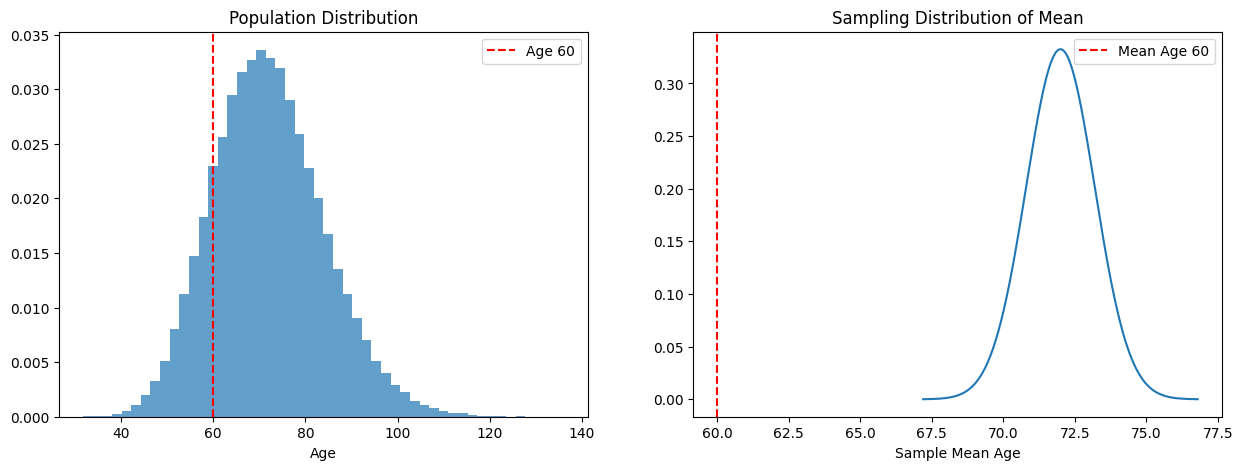

Probability of sampling an individual aged 60 or younger: 0.1596
Probability of a sample mean age of 60 or lower: 7.6199e-24


In [27]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Population parameters
pop_mean = 72
pop_std = 12

# Sample size
n = 100

# Sampling distribution parameters
sampling_mean = pop_mean
sampling_std = pop_std / np.sqrt(n)

# Creating a function for left-skewed distribution (using gamma as an approximation)
def left_skewed(mean, std, size):
    a = (mean / std) ** 2
    scale = std ** 2 / mean
    return np.random.gamma(a, scale, size)

# Generating population data
pop_data = left_skewed(pop_mean, pop_std, 100000)

# Calculating probabilities
prob_individual_60 = np.mean(pop_data <= 60)
prob_sample_mean_60 = stats.norm.cdf(60, sampling_mean, sampling_std)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Population distribution
ax1.hist(pop_data, bins=50, density=True, alpha=0.7)
ax1.axvline(60, color='r', linestyle='--', label='Age 60')
ax1.set_title('Population Distribution')
ax1.set_xlabel('Age')
ax1.legend()

# Sampling distribution
x = np.linspace(sampling_mean - 4*sampling_std, sampling_mean + 4*sampling_std, 1000)
y = stats.norm.pdf(x, sampling_mean, sampling_std)
ax2.plot(x, y)
ax2.axvline(60, color='r', linestyle='--', label='Mean Age 60')
ax2.set_title('Sampling Distribution of Mean')
ax2.set_xlabel('Sample Mean Age')
ax2.legend()

plt.show()

print(f"Probability of sampling an individual aged 60 or younger: {prob_individual_60:.4f}")
print(f"Probability of a sample mean age of 60 or lower: {prob_sample_mean_60:.4e}")

**Explanation:**

The key difference is that individual observations can vary widely, but sample means of large samples (n=100) tend to cluster closely around the population mean due to the law of large numbers and the Central Limit Theorem.

This demonstrates why it's much more likely to encounter an individual with an "extreme" value than it is to find a sample mean with an equally "extreme" value when using a reasonably large sample size.

------------------------------------------------------------------------

d) Describe the sampling distribution of $\bar{Y}$ : (i) for a random sample of size $n = 1$; (ii) if you sample all 90,000 residents.

`(d) Answer`

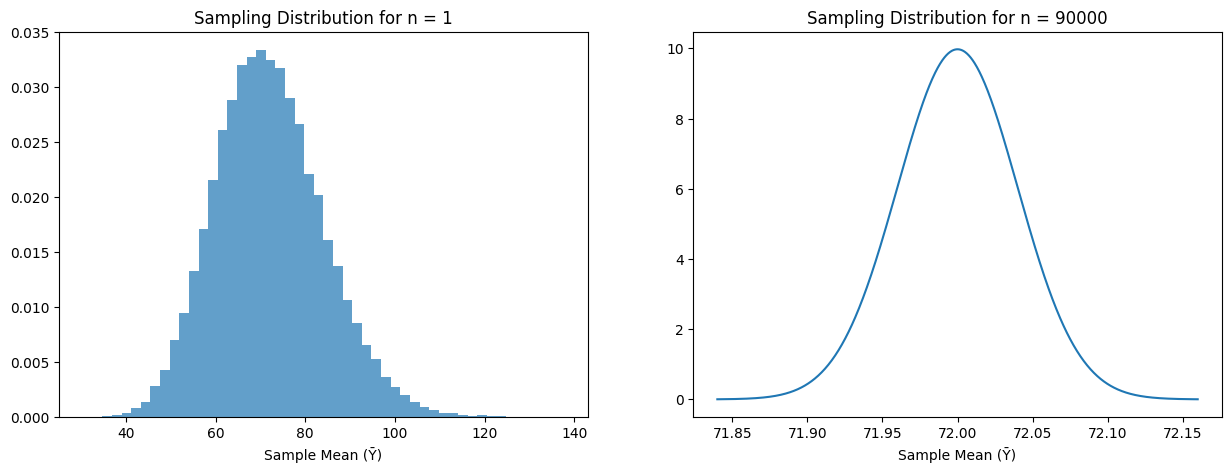

Case (i) - n = 1:
  Mean: 72
  Standard Error: 12.0

Case (ii) - n = 90000:
  Mean: 72
  Standard Error: 0.0400


In [29]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Population parameters
pop_mean = 72
pop_std = 12
pop_size = 90000

# Function to create a left-skewed distribution (using gamma as an approximation)
def left_skewed(mean, std, size):
    a = (mean / std) ** 2
    scale = std ** 2 / mean
    return np.random.gamma(a, scale, size)

# Generate population data
pop_data = left_skewed(pop_mean, pop_std, pop_size)

# Case (i): n = 1
n1 = 1
se1 = pop_std / np.sqrt(n1)

# Case (ii): n = 90000
n2 = pop_size
se2 = pop_std / np.sqrt(n2)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Case (i): n = 1
ax1.hist(pop_data, bins=50, density=True, alpha=0.7)
ax1.set_title('Sampling Distribution for n = 1')
ax1.set_xlabel('Sample Mean (Ȳ)')

# Case (ii): n = 90000
x = np.linspace(pop_mean - 4*se2, pop_mean + 4*se2, 1000)
y = stats.norm.pdf(x, pop_mean, se2)
ax2.plot(x, y)
ax2.set_title('Sampling Distribution for n = 90000')
ax2.set_xlabel('Sample Mean (Ȳ)')

plt.show()

print(f"Case (i) - n = 1:")
print(f"  Mean: {pop_mean}")
print(f"  Standard Error: {se1}")

print(f"\nCase (ii) - n = 90000:")
print(f"  Mean: {pop_mean}")
print(f"  Standard Error: {se2:.4f}")

**Explanation:**

As sample size increases from 1 to 90,000, the sampling distribution transitions from the population distribution to a single point.

The mean of the sampling distribution remains constant at 72 years.

The standard error decreases from 12 years (n=1) to nearly 0 (n=90,000).

For n=1, each sample could be any value from the population, while for n=90,000, you always get the exact population mean.

This illustrates how sample size affects the precision of our estimates: larger samples provide more precise estimates of the population mean.

## Problem 3.21.

In your school, suppose that GPA has an approximate normal distribution with $\mu = 3.0, \sigma = 0.40.$ Not knowing $\mu$, you randomly sample $n = 25$ students to estimate it. Using simulation for this application, illustrate the difference between a sample data distribution and the sampling distribution of Y .

`Answer`

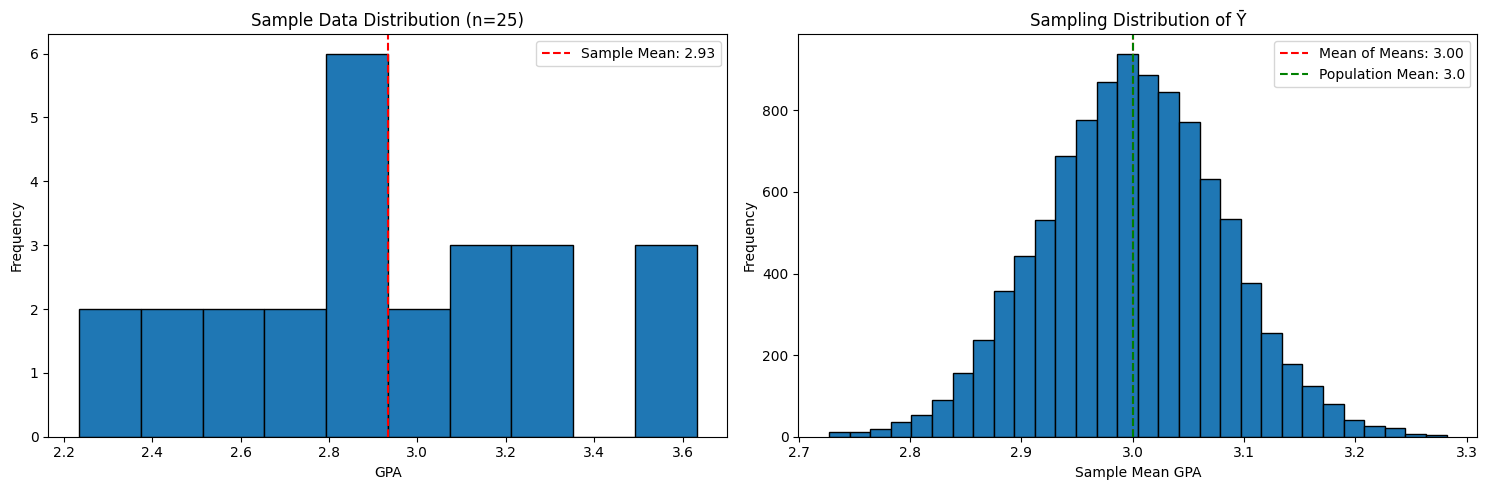

Sample Data - Mean: 2.9346, Std Dev: 0.3749
Sampling Distribution - Mean: 3.0001, Std Dev: 0.0809
Theoretical SE: 0.0800


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Setting random seed for reproducibility
np.random.seed(42)

# Population parameters
mu = 3.0
sigma = 0.40
n = 25

# Number of simulations for sampling distribution
num_simulations = 10000

# Generating one sample of 25 students
sample = np.random.normal(mu, sigma, n)

# Generating 10000 samples of 25 students each for sampling distribution
samples = np.random.normal(mu, sigma, (num_simulations, n))
sample_means = np.mean(samples, axis=1)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Sample Data Distribution
ax1.hist(sample, bins=10, edgecolor='black')
ax1.axvline(np.mean(sample), color='r', linestyle='dashed', label=f'Sample Mean: {np.mean(sample):.2f}')
ax1.set_title('Sample Data Distribution (n=25)')
ax1.set_xlabel('GPA')
ax1.set_ylabel('Frequency')
ax1.legend()

# Sampling Distribution of Ȳ
ax2.hist(sample_means, bins=30, edgecolor='black')
ax2.axvline(np.mean(sample_means), color='r', linestyle='dashed', label=f'Mean of Means: {np.mean(sample_means):.2f}')
ax2.axvline(mu, color='g', linestyle='dashed', label=f'Population Mean: {mu}')
ax2.set_title('Sampling Distribution of Ȳ')
ax2.set_xlabel('Sample Mean GPA')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Sample Data - Mean: {np.mean(sample):.4f}, Std Dev: {np.std(sample):.4f}")
print(f"Sampling Distribution - Mean: {np.mean(sample_means):.4f}, Std Dev: {np.std(sample_means):.4f}")
print(f"Theoretical SE: {sigma/np.sqrt(n):.4f}")

**Key Differences:**

**Shape:** Sample data distribution may not be perfectly normal, while the sampling distribution is normal.

**Center:** Sample data mean varies more, while the mean of the sampling distribution is stable around the population mean.

**Spread:** Sample data distribution is wider, while the sampling distribution is narrower.
Interpretation: Sample data shows individual GPAs in one sample, while the sampling distribution shows how sample means would vary across many samples.

This simulation illustrates why the sample mean (Ȳ) is a good estimator of the population mean (μ), and how the precision of this estimate improves with larger sample sizes.

## Problem 3.26.

When sample data were used to rank states by brain cancer rates, Ellenberg (2014) noted
that the highest ranking state (South Dakota) and the nearly lowest ranking state (North
Dakota) had relatively small sample sizes. Also, when schools in North Carolina were ranked
by their average improvement in test scores, the best and the worst schools were very small
schools. Explain how these results could merely reflect how the variability of sample means and
proportions depends on the sample size.

`Answer`

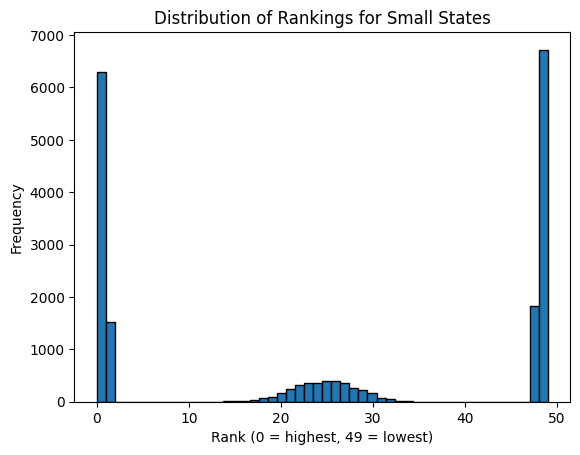

Probability of a small state being ranked highest: 0.63
Probability of a small state being ranked lowest: 0.67


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

def simulate_rankings(population_rate, num_states, small_n, large_n, num_simulations):
    rankings = []
    for _ in range(num_simulations):
        rates = []
        for i in range(num_states):
            if i < 2:  # Small states (like North and South Dakota)
                n = small_n
            else:
                n = large_n
            sample = np.random.binomial(n, population_rate) / n
            rates.append((sample, i))
        rates.sort(reverse=True)
        rankings.append([i for _, i in rates])
    return rankings

# Setting parameters
population_rate = 0.05  # 5% cancer rate
num_states = 50
small_n = 100  # Small population states
large_n = 10000  # Large population states
num_simulations = 10000

rankings = simulate_rankings(population_rate, num_states, small_n, large_n, num_simulations)

# Counting how often small states are in extreme positions
small_states_highest = sum(r[0] < 2 for r in rankings) / num_simulations
small_states_lowest = sum(r[-1] < 2 for r in rankings) / num_simulations


# Visualizing the distribution of ranks for small states
small_state_ranks = [r.index(0) for r in rankings] + [r.index(1) for r in rankings]
plt.hist(small_state_ranks, bins=50, edgecolor='black')
plt.title("Distribution of Rankings for Small States")
plt.xlabel("Rank (0 = highest, 49 = lowest)")
plt.ylabel("Frequency")
plt.show()

print(f"Probability of a small state being ranked highest: {small_states_highest:.2f}")
print(f"Probability of a small state being ranked lowest: {small_states_lowest:.2f}")


**Explanation:**

1. Sampling Variability: Smaller samples have greater variability in their estimates (means or proportions) compared to larger samples.

2. Extreme Rankings: Due to this increased variability, smaller samples are more likely to produce extreme values (very high or very low) by chance.

3. Simulation Results: Our simulation shows that small states (or schools) have a higher probability of being ranked at the extremes (highest or lowest) despite having the same underlying rate as larger states.

4. Regression to the Mean: If these extreme-ranked entities are measured again, they're likely to be closer to the average, a phenomenon known as regression to the mean.

5. Misinterpretation Risk: Without considering sample size, one might incorrectly conclude that small states or schools are inherently better or worse, when in reality, their extreme rankings are often just a statistical artifact.

As a result, the observation that small states or schools often occupy extreme rankings is largely due to the greater variability in small samples. This underscores the importance of considering sample size and using appropriate statistical methods when making comparisons or rankings based on sample data.

